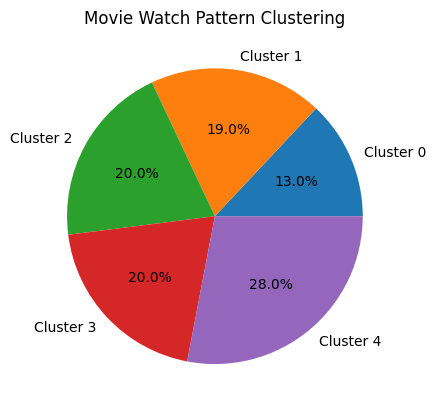

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("movie_watch.csv")

df.rename(columns={
    'watch_time_hour': 'hour',
    'genre_preference': 'genre',
    'avg_rating_given': 'rating'
}, inplace=True)

label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

features = df[['hour', 'genre_encoded', 'rating']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

cluster_counts = df['cluster'].value_counts().sort_index()
labels = [f"Cluster {i}" for i in cluster_counts.index]

plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%')
plt.title("Movie Watch Pattern Clustering")
plt.show()
